In [1]:
# from google.colab import files
# uploaded = files.upload()

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
raw_data = pd.read_csv('Phishing.csv')
raw_data.head(10)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1


In [3]:
lb_enc = LabelEncoder()
raw_data["NEW_RESULT"] = lb_enc.fit_transform(raw_data["Result"])
raw_data[["Result", "NEW_RESULT"]]
df = raw_data.drop(['Result'], axis = 1)
df.head(10)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,NEW_RESULT
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,0
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,0
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,0
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,0
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,0
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,0
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,0


In [4]:
data_X = df.drop(['NEW_RESULT'], axis=1)
data_y = pd.DataFrame(df['NEW_RESULT'])
y = data_y.loc[:,:].values
X = data_X.iloc[:,:].values

In [5]:
import random
import pyswarms as ps

%load_ext autoreload
%autoreload 2
%matplotlib inline
  
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [6]:
from sklearn import linear_model

# Create an instance of the classifier
classifier = linear_model.LogisticRegression()

# Define objective function
def f_per_particle(m, alpha):
    """Computes for the objective function per particle

    Inputs
    ------
    m : numpy.ndarray
        Binary mask that can be obtained from BinaryPSO, will
        be used to mask features.
    alpha: float (default is 0.5)
        Constant weight for trading-off classifier performance
        and number of features

    Returns
    -------
    numpy.ndarray
        Computed objective function
    """
    total_features = 30
    # Get the subset of the features from the binary mask
    if np.count_nonzero(m) == 0:
        X_subset = X
    else:
        X_subset = X[:,m==1]
    # Perform classification and store performance in P
    classifier.fit(X_subset, y)
    P = (classifier.predict(X_subset) == y).mean()
    # Compute for the objective function
    j = (alpha * (1.0 - P)
        + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))

    return j

In [7]:
def f(x, alpha=0.88):
    """Higher-level method to do classification in the
    whole swarm.

    Inputs
    ------
    x: numpy.ndarray of shape (n_particles, dimensions)
        The swarm that will perform the search

    Returns
    -------
    numpy.ndarray of shape (n_particles, )
        The computed loss for each particle
    """
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], alpha) for i in range(n_particles)]
    return np.array(j)

In [8]:
%%time
# Initialize swarm, arbitrary
options = {'c1': 0.5, 'c2': 0.5, 'w':0.9, 'k': 30, 'p':2}

# Call instance of PSO
dimensions = 30 # dimensions should be the number of features
optimizer = ps.discrete.BinaryPSO(n_particles=50, dimensions=dimensions, options=options)

# Perform optimization
cost, pos = optimizer.optimize(f, iters=500)


2021-01-12 16:00:25,894 - pyswarms.discrete.binary - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|500/500, best_cost=0.433
2021-01-12 19:28:09,760 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.4331691591792282, best pos: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Wall time: 3h 27min 43s


In [9]:
# Create two instances of LogisticRegression
classfier = linear_model.LogisticRegression()

# Get the selected features from the final positions
X_selected_features = X[:,pos==1]  # subset

# Perform classification and store performance in P
classifier.fit(X_selected_features, y)

# Compute performance
subset_performance = (classifier.predict(X_selected_features) == y).mean()


print('Subset performance: %.3f' % (subset_performance))

Subset performance: 0.508


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, test_size=0.2, random_state=0, stratify=y)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(8844, 30)
(2211, 30)
(8844, 1)
(2211, 1)


In [11]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
# print (X_train.shape)
# print (X_test.shape)
# print (y_train.shape)
# print (y_test.shape)

### Classification using SVM (entire dataset)

In [12]:
import time
start_time = time.time()
clf_SVM = LinearSVC()
clf_SVM.fit(X_train, y_train)

LinearSVC()

In [13]:
y_pred_SVM = clf_SVM.predict(X_test)
score_SVM = clf_SVM.score(X_test, y_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_SVM))
print("--- %s seconds ---" % (time.time() - start_time))

Accuracy: 0.9303482587064676
--- 9.048925876617432 seconds ---


### Classification using ANN (entire dataset)

In [14]:
import time
start_time = time.time()
max_test_score = 0
for i in range(1,20):
    for j in range(1, 20):
        clf_mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(i, j), random_state=0)
        clf_mlp.fit(X_train, y_train)
        train_score = clf_mlp.score(X_train, y_train)
        test_score = clf_mlp.score(X_test, y_test)
        if test_score > max_test_score:
            related_train_score = train_score
            max_test_score = test_score
            max_i = i
            max_j = j
            best_clf_mlp = clf_mlp
print(best_clf_mlp)
print("1st hl nodes num: ", max_i, "; 2nd hl nodes num: ", max_j, "; train score: ", related_train_score, "; test score: ", max_test_score)
print("--- %s seconds ---" % (time.time() - start_time))

MLPClassifier(hidden_layer_sizes=(13, 10), random_state=0, solver='lbfgs')
1st hl nodes num:  13 ; 2nd hl nodes num:  10 ; train score:  0.9734283129805518 ; test score:  0.9620081411126187
--- 1427.8014225959778 seconds ---


### Dimentionality reduction using LDA

In [15]:
lda = LDA(n_components = 1)
X_lda = lda.fit_transform(X_selected_features, y) 
X_lda.shape

(11055, 1)

In [16]:
lda_data = np.vstack((X_lda.T, df['NEW_RESULT'])).T
lda_df   = pd.DataFrame(data=lda_data, columns=("1st-component","Result"))
lda_df.tail(5)

,1st-component,Result
11050,-2.708884,1.0
11051,3.003740,0.0
11052,0.867899,0.0
11053,2.169823,0.0
11054,3.671272,0.0


In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=0, stratify=y)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(8844, 1)
(2211, 1)
(8844, 1)
(2211, 1)


### Classification using SVM (after LDA)

In [18]:
import time
start_time = time.time()
clf_SVM = LinearSVC()
clf_SVM.fit(X_train, y_train)

LinearSVC()

In [19]:
y_pred_SVM = clf_SVM.predict(X_test)
score_SVM = clf_SVM.score(X_test, y_test)
test_score_SVM = clf_SVM.score(X_test,y_test)
train_score_SVM = clf_SVM.score(X_train,y_train)
best_clf_svm = clf_SVM
print("Test set Accuracy:",metrics.accuracy_score(y_test, y_pred_SVM))
print("--- %s seconds ---" % (time.time() - start_time))

Test set Accuracy: 0.932157394843962
--- 1.121222972869873 seconds ---


2021-01-12 20:02:30,316 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.


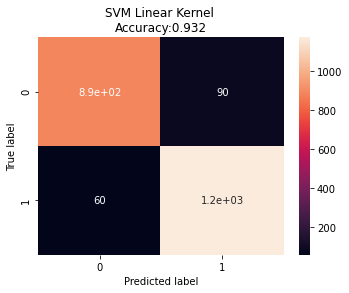

In [20]:
# # Creates a confusion matrix
y_svm_pred = best_clf_svm.predict(X_test)
cm = confusion_matrix(y_test, y_svm_pred) 

plt.figure(figsize=(5.5,4))
sns.heatmap(cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_svm_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Classification using ANN (after LDA)

In [21]:
import time
start_time = time.time()
max_test_score = 0
for i in range(1,20):
    for j in range(1, 20):
        clf_mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(i, j), random_state=0)
        clf_mlp.fit(X_train, y_train)
        train_score = clf_mlp.score(X_train, y_train)
        test_score = clf_mlp.score(X_test, y_test)
        if test_score > max_test_score:
            related_train_score = train_score
            max_test_score = test_score
            max_i = i
            max_j = j
            best_clf_mlp = clf_mlp
print(best_clf_mlp)
print("1st hl nodes num: ", max_i, "; 2nd hl nodes num: ", max_j, "; train score: ", related_train_score, "; test score: ", max_test_score)
print("---Time %s seconds ---" % (time.time() - start_time))

MLPClassifier(hidden_layer_sizes=(1, 12), random_state=0, solver='lbfgs')
1st hl nodes num:  1 ; 2nd hl nodes num:  12 ; train score:  0.9211895070104026 ; test score:  0.9339665309814563
---Time 1022.8778254985809 seconds ---


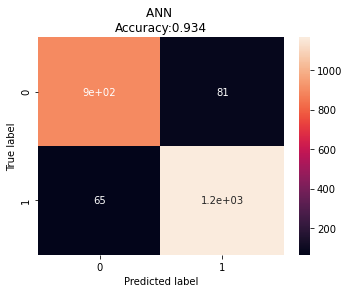

In [22]:
y_mlp_pred = best_clf_mlp.predict(X_test)
cm = confusion_matrix(y_test, y_mlp_pred) 
plt.figure(figsize=(5.5,4))
sns.heatmap(cm, annot=True)
plt.title('ANN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_mlp_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### MLP classifier prediction evaluation

In [23]:
print("MLP classifier prediction evaluation")
print(classification_report(y_test, y_mlp_pred, target_names=['0', '1']))

MLP classifier prediction evaluation
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       980
           1       0.94      0.95      0.94      1231

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



### SVM classifier prediction evaluation

In [24]:
print("SVM classifier prediction evaluation")
print(classification_report(y_test, y_svm_pred, target_names=['0', '1']))

SVM classifier prediction evaluation
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       980
           1       0.93      0.95      0.94      1231

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211

